In [385]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy.signal as sig

In [386]:
rate = 2000 #Sampling rate
interval = 1.0/rate #Sampling frequency
t = np.arange(0, 1, interval) #Time array

data_array_1 = 2*np.sin(2*np.pi*2*t) #Sinusoid of frequency 2 Hz 
data_array_2 = np.sin(2*np.pi*3*t) #Sinusoid of frequency 3 Hz

signal = data_array_1 + data_array_2 #Sum of sinusoids

SIGNAL_transform = np.fft.fft(signal) #Fourier transform of signal
N = len(SIGNAL_transform) #Number of data points in frequency domain
n = np.arange(N) #Array of N
T = N/rate #Sampling period
frequency = n/T #Sampling frequency

inverse = np.fft.ifft(SIGNAL_transform) #Inverse of the Fourier transform

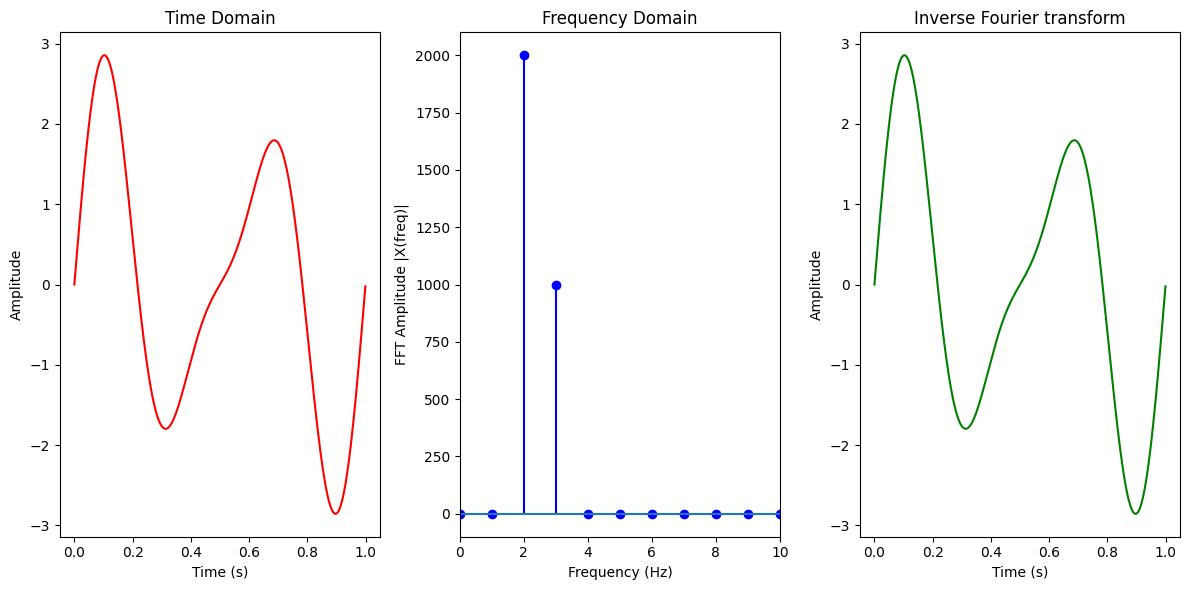

In [387]:
# Time domain plot
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.plot(t, signal, 'r')
plt.title('Time Domain')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Frequency domain plot
plt.subplot(132)
plt.stem(frequency, np.abs(SIGNAL_transform), 'b', markerfmt="o", basefmt="-")
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

# Inverse transfrom domain plot
plt.subplot(133)
plt.plot(t, inverse, 'g')
plt.title('Inverse Fourier transform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

## Note theory

The frequencies of each keys of a piano are given by :

$$f(n)=\left(\sqrt[12]{2}\right)^{n-49}\times 440$$

with $n\in\N_0$.

In [ ]:
N = 100 #Number of keys
keys = np.arange(1, N, 1)

notes = (np.power(2, (1/12)))**(keys-49)*440 # Frequencies of each notes

Text(0, 0.5, 'Frequency (Hz)')

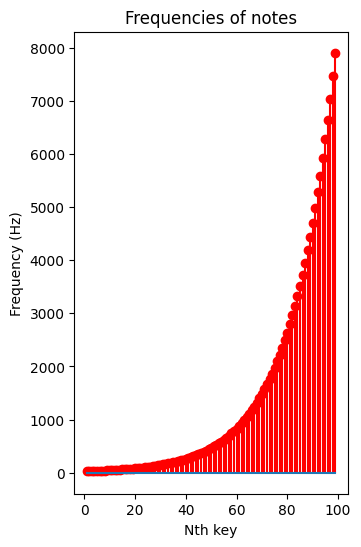

In [389]:
# Notes
plt.figure(figsize=(12, 6))
plt.subplot(131)
plt.stem(keys, notes, 'r', markerfmt="o", basefmt="-")
plt.title('Frequencies of notes')
plt.xlabel('Nth key')
plt.ylabel('Frequency (Hz)')


In [ ]:
sample_path = "sample_1.mp3"
audio_signal, sample_rate = librosa.load(sample_path, sr=None, mono=False)

if audio_signal.ndim > 1:
    audio_signal = audio_signal[0, :]

cutoff_frequency = 7000 
nyquist = 1.0 * sample_rate 
normal_cutoff = cutoff_frequency / nyquist 

b, a = sig.butter(N=4, Wn=normal_cutoff, btype='low', analog=False)
filtered_signal = sig.filtfilt(b, a, audio_signal)

time = librosa.times_like(audio_signal, sr=sample_rate)

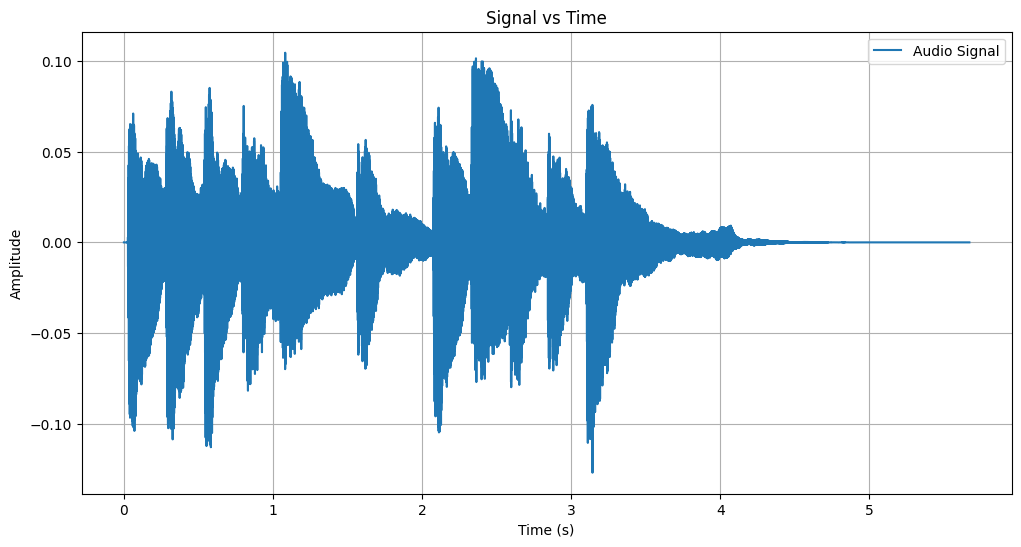

In [391]:
plt.figure(figsize=(12, 6))
plt.plot(time/1000, filtered_signal, label="Audio Signal")
plt.title("Signal vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

In [ ]:
fft_result = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(fft_result), d=1/sample_rate)
magnitude = np.abs(fft_result)

filtered_fft_result = np.zeros_like(fft_result)
for target_frequency in notes:
    idx = np.argmin(np.abs(frequencies - target_frequency))
    filtered_fft_result[idx] = fft_result[idx] 

cleanup_threshold = 95
filtered_fft_result[np.abs(filtered_fft_result) < cleanup_threshold] = 0
    
filtered_magnitude = np.abs(filtered_fft_result)


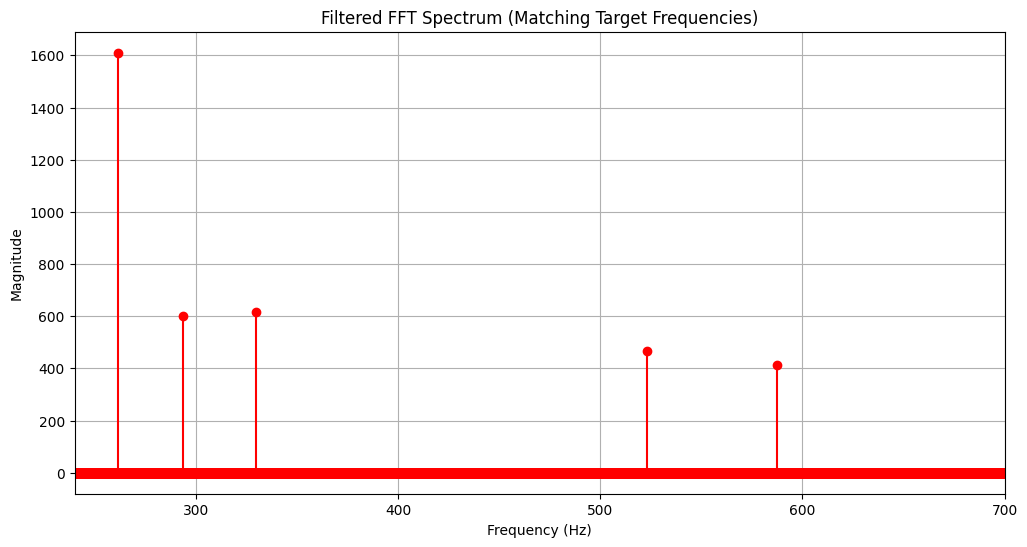

Displayed Frequencies and Magnitudes:
Frequency: 261.65 Hz, Magnitude: 1610.22
Frequency: 293.70 Hz, Magnitude: 599.38
Frequency: 329.63 Hz, Magnitude: 616.14
Frequency: 523.21 Hz, Magnitude: 468.38
Frequency: 587.31 Hz, Magnitude: 412.94


In [ ]:
plt.figure(figsize=(12, 6))
plt.stem(frequencies[:len(frequencies)//2], filtered_magnitude[:len(filtered_magnitude)//2], 'r', markerfmt="o", basefmt=" ")
plt.title("Filtered FFT Spectrum (Matching Target Frequencies)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.xlim(240,700)
plt.show()

print("Displayed Frequencies and Magnitudes:")
for freq, mag in zip(frequencies, filtered_magnitude):
    if mag > 0: 
        print(f"Frequency: {freq:.2f} Hz, Magnitude: {mag:.2f}")